In [18]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

[Text(0, 0, '99.96'), Text(0, 0, '99.995')]

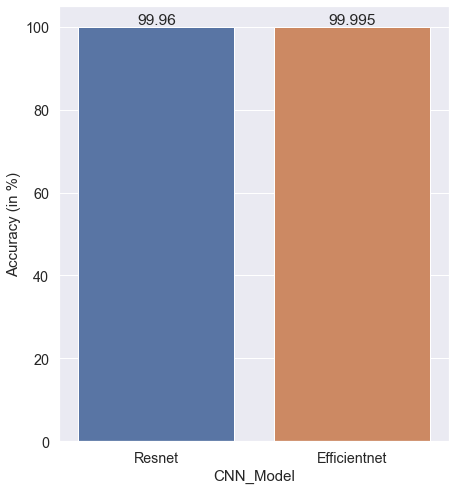

In [42]:
sns.set(font_scale = 1.3)
plt.figure(figsize=(7, 8))
ax = sns.barplot(x=['Resnet', 'Efficientnet'], y=[99.96, 99.995], palette="deep")
ax.set_xlabel("CNN_Model", fontsize = 15)
ax.set_ylabel("Accuracy (in %)", fontsize = 15)
ax.bar_label(ax.containers[0])

### Prediction

In [27]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt 

In [28]:
import torch
from callbacks import EarlyStopping
from CNN_Resnet import CNNModel
import os
from PIL import Image
import matplotlib.pyplot as plt 

In [29]:
hyperpara = {
    'out_features': 29,
    'lr': 1e-3,
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [30]:
resmodel = CNNModel(**hyperpara)

In [31]:
resmodel.load("models/final_resnet.pth", device=device)

In [32]:
test_tfms = tt.Compose([tt.ToTensor()])

In [33]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 
            'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

softmax = torch.nn.Softmax(dim=1)

def predict_frame(model, img_tensor):
    prediction = model.predict_one_step(img_tensor)
    s = softmax(prediction)
    class_id = torch.argmax(s)
    # print(classes[class_id])
    return class_id

In [34]:
def predict_model(model):
    data_dir = "./asl_alphabet_test/asl_alphabet_test/"
    for paths in os.listdir(data_dir):
        im = Image.open(data_dir + paths)
        label = paths.split("_")[0]
        if label in ["F", "G"]:
            continue
        # im.show()
        plt.imshow(im)
        im = im.resize((200,200))
        img_tensor = tt.ToTensor()(im).unsqueeze_(0)
        img_tensor = img_tensor.unsqueeze_(0)
        class_id = predict_frame(model, img_tensor)
        print(f"Label: {label}")
        print(f"Predicted: {classes[class_id]}")
        break
        # print(paths)

Label: L
Predicted: L


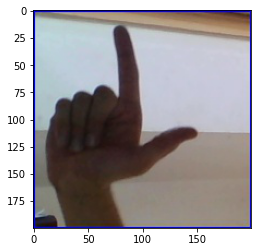

In [35]:
predict_model(resmodel)

In [ ]:
from CNN_Efficient import CNNModel_Eff

model = CNNModel_Eff(**hyperpara)
model.load('models/final_efficient.pth', device=device)

In [ ]:
predict_model()

In [11]:
data_dir = "./asl_alphabet_test/asl_alphabet_test/"
for paths in os.listdir(data_dir):
    im = Image.open(data_dir + paths)
    im = im.resize((200,200))
    img_tensor = tt.ToTensor()(im).unsqueeze_(0)
    img_tensor = img_tensor.unsqueeze_(0)
    class_id = predict_frame(img_tensor)
    print(classes[class_id])
    print(paths)

TypeError: predict_frame() missing 1 required positional argument: 'img_tensor'